In [71]:
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
produccion=pd.read_csv("Producion-petroleo-gas1.csv",delimiter=";")

In [101]:
produccion

,Anio,mes,Produccion en (m3),Precio barril(160L),Produccion en L,Cantidad de barriles,Nafta,Diesel,mes_num,Fecha
0,2009,Enero,3035663,41.54,1259304296,7870651.85,1.023185e+08,1.928310e+08,1,2009-01-01
1,2009,Febrero,2801234,41.41,1493733296,9335833.10,1.213658e+08,2.287279e+08,2,2009-02-01
2,2009,Marzo,3079215,45.78,1215752296,7598451.85,9.877987e+07,1.861621e+08,3,2009-03-01
3,2009,Abril,2966412,50.20,1328555296,8303470.60,1.079451e+08,2.034350e+08,4,2009-04-01
4,2009,Mayo,3042712,56.98,1252255296,7826595.60,1.017457e+08,1.917516e+08,5,2009-05-01
...,...,...,...,...,...,...,...,...,...,...
175,2023,Agosto,3065891,84.72,1229076296,7681726.85,9.986245e+07,1.882023e+08,8,2023-08-01
176,2023,Septiembre,3037488,94.40,1257479296,7859245.60,1.021702e+08,1.925515e+08,9,2023-09-01
177,2023,Octubre,3221109,88.81,1073858296,6711614.35,8.725099e+07,1.644346e+08,10,2023-10-01
178,2023,Noviembre,3178924,81.35,1116043296,6975270.60,9.067852e+07,1.708941e+08,11,2023-11-01


In [94]:
produccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Anio                  180 non-null    int64         
 1   mes                   180 non-null    object        
 2   Produccion en (m3)    180 non-null    int32         
 3   Precio barril(160L)   180 non-null    float64       
 4   Produccion en L       180 non-null    int32         
 5   Cantidad de barriles  180 non-null    float64       
 6   Nafta                 180 non-null    float64       
 7   Diesel                180 non-null    float64       
 8   mes_num               180 non-null    int64         
 9   Fecha                 180 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int32(2), int64(2), object(1)
memory usage: 12.8+ KB


Se realiza cambios de tipo de dato para optimizar su uso y trabajo

In [93]:
produccion['Precio barril(160L)'] = produccion['Precio barril(160L)'].str.replace(',', '.').astype(float)


In [55]:
produccion['Produccion en (m3)'] = produccion['Produccion en (m3)'].str.replace(',', '.').astype(float)

# Convertir la columna a enteros (int)
produccion['Produccion en (m3)'] = produccion['Produccion en (m3)'].astype(int)

Vamos a calcular algunas variables como cantidad de litros barriles que se sacan y lo que se puede producir de nafta y diesel por barril
eso se realiza con datos estandar 

In [65]:
produccion['Produccion en L'] = abs(produccion['Produccion en (m3)'] * 1000)
produccion['Cantidad de barriles'] = abs(produccion['Produccion en L'] / 160)

In [69]:
produccion['Nafta'] = abs(produccion['Cantidad de barriles'] * 13)
produccion['Diesel'] = abs(produccion['Cantidad de barriles'] * 24.5)

# Se realizan algunas visualizaciones para intentar encontrar relaciones

<function matplotlib.pyplot.show(close=None, block=None)>

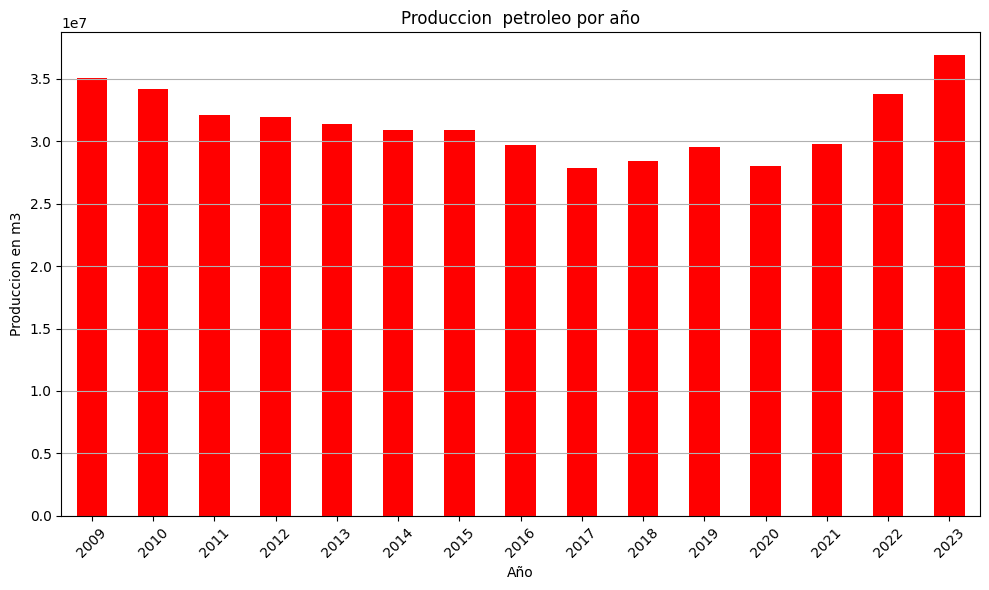

In [73]:
produccion_por_anio=produccion.groupby('Anio')['Produccion en (m3)'].sum()

plt.figure(figsize=(10,6))
produccion_por_anio.plot(kind='bar',color='red')
plt.title('Produccion  petroleo por año')
plt.xlabel('Año')
plt.ylabel('Produccion en m3')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show

No se puede vr un patron claro pero si que la produccion es estable y en los utimos años empeza o crecer 

Se crea una columna de fechas para realiazar otros analisis de tiempo 

In [74]:
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

In [76]:
produccion['mes_num']=produccion['mes'].str.lower().map(meses)
produccion['Fecha']=produccion['Anio'].astype(str) + '-' + produccion['mes_num'].astype(str)
produccion['Fecha']=pd.to_datetime(produccion['Fecha'], format='%Y-%m')

In [83]:
produccion = produccion.sort_values('Fecha')

<function matplotlib.pyplot.show(close=None, block=None)>

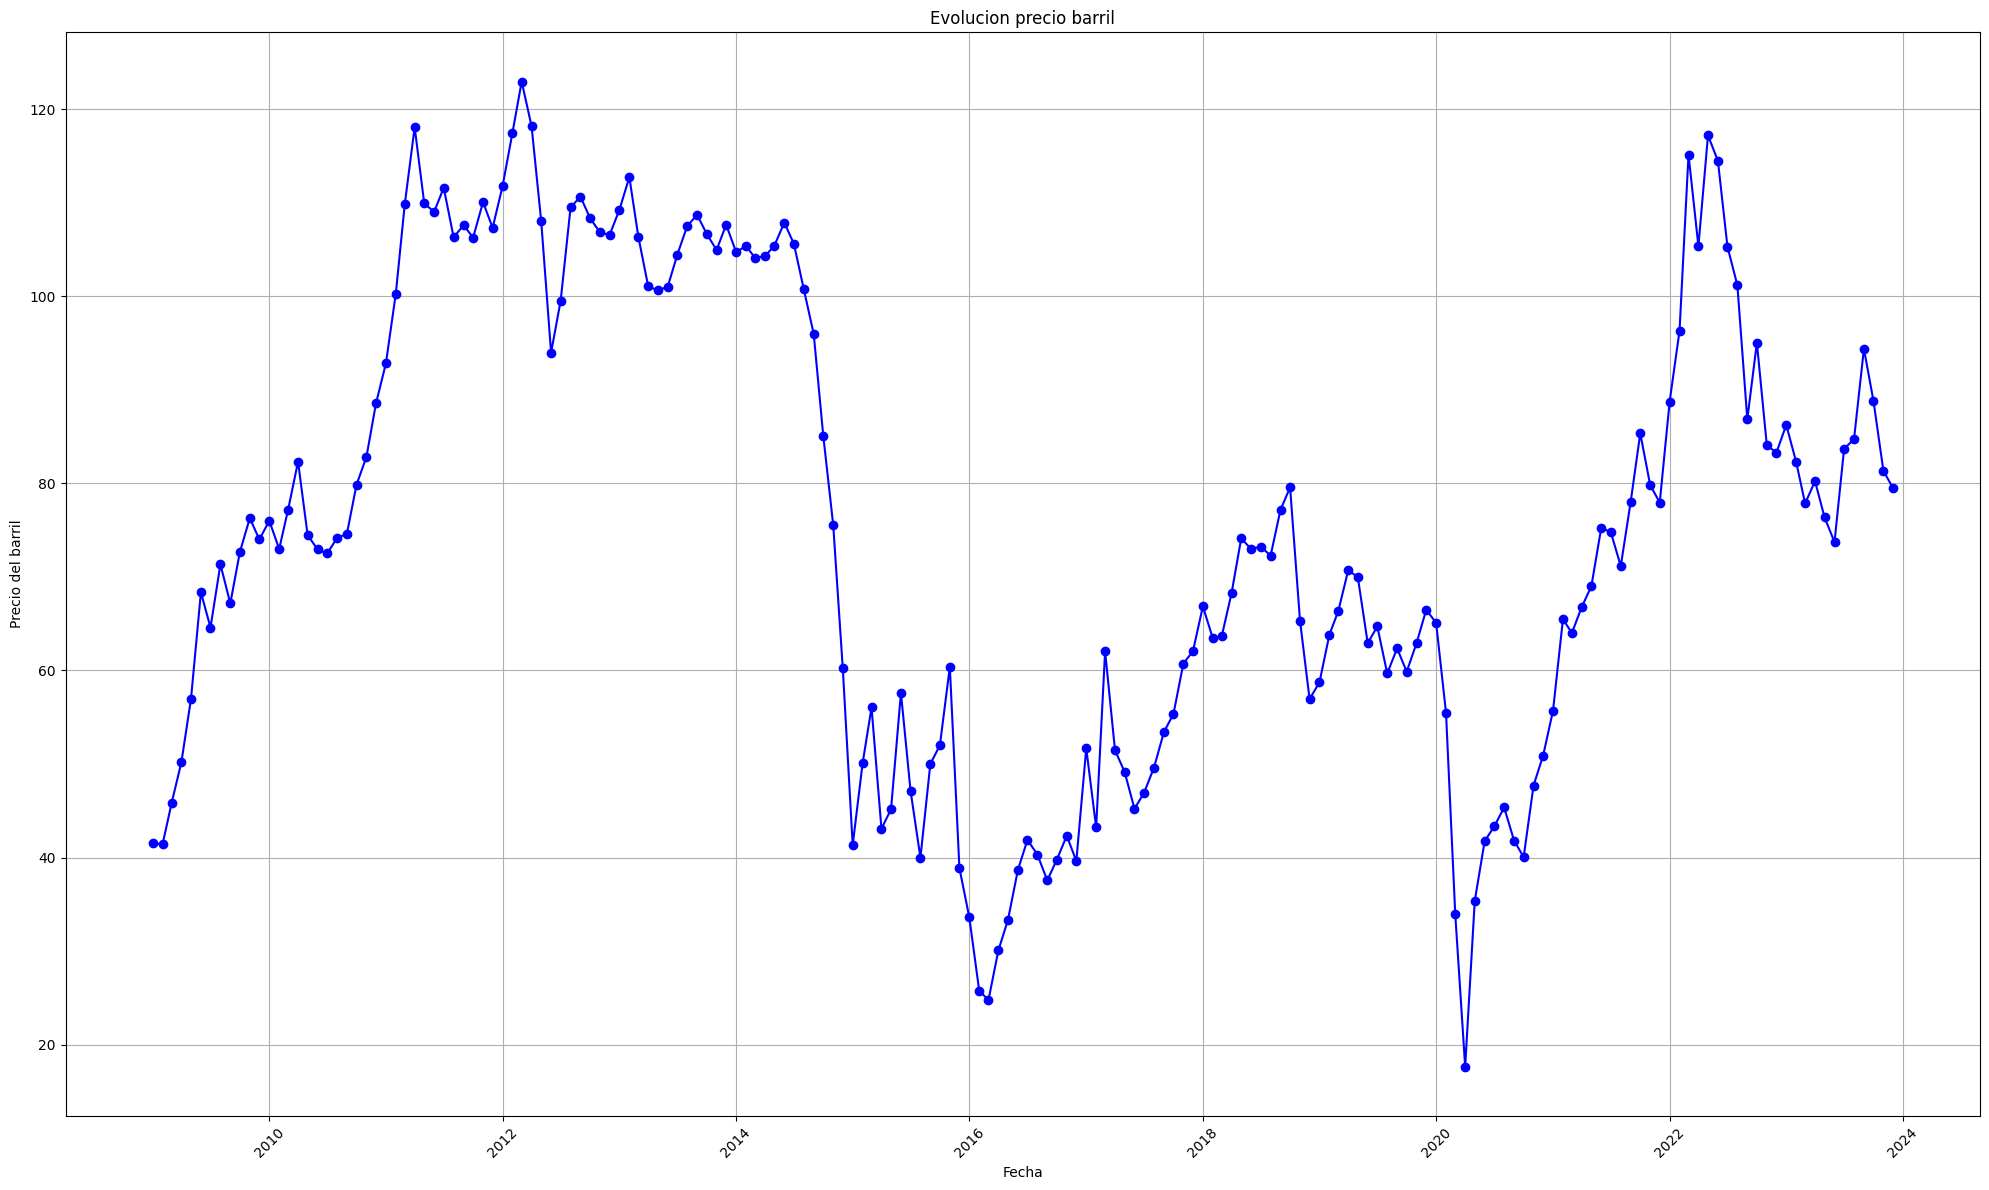

In [95]:
plt.figure(figsize=(20,12))
plt.plot(produccion['Fecha'],produccion['Precio barril(160L)'],marker='o',color='blue')
plt.title('Evolucion precio barril')
plt.xlabel('Fecha')
plt.ylabel('Precio del barril')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show

El patron que se ve es que cualdo alcalza un pico empieza a tener caida el precio del combustible

In [88]:
produccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Anio                  180 non-null    int64         
 1   mes                   180 non-null    object        
 2   Produccion en (m3)    180 non-null    int32         
 3   Precio barril(160L)   180 non-null    object        
 4   Produccion en L       180 non-null    int32         
 5   Cantidad de barriles  180 non-null    float64       
 6   Nafta                 180 non-null    float64       
 7   Diesel                180 non-null    float64       
 8   mes_num               180 non-null    int64         
 9   Fecha                 180 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(2)
memory usage: 12.8+ KB


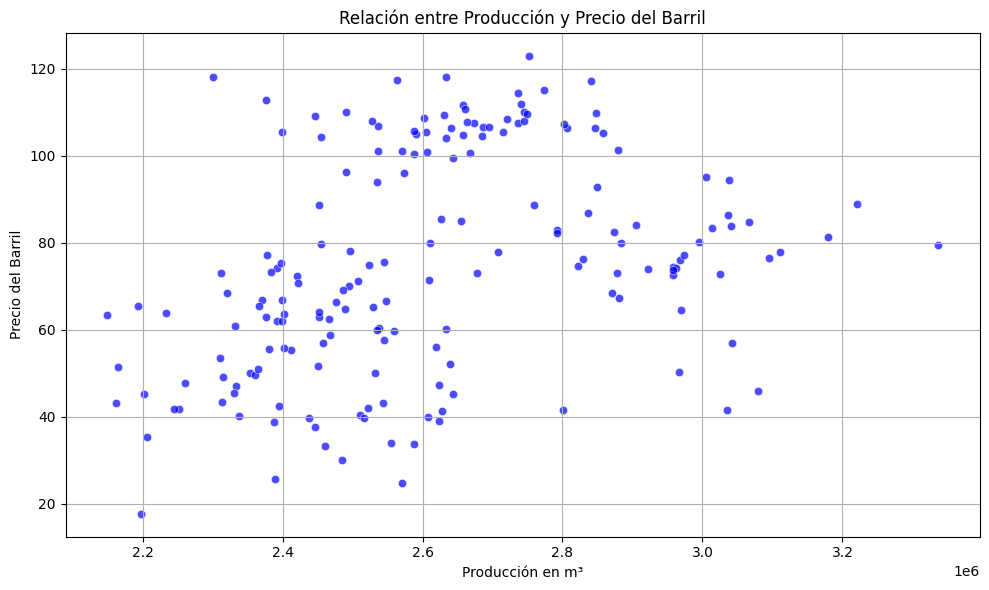

In [97]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=produccion, x='Produccion en (m3)', y='Precio barril(160L)', color='blue', alpha=0.7)
plt.title('Relación entre Producción y Precio del Barril')
plt.xlabel('Producción en m³')
plt.ylabel('Precio del Barril')
plt.grid(True)  # Mostrar una rejilla
plt.tight_layout()  # Ajustar el diseño para evitar recorte de etiquetas
plt.show()

No se ve un patron de produccion baja precio bajo tiene poca relacion se realizara una matriz de correlacion para verlo en mayor profundidad 

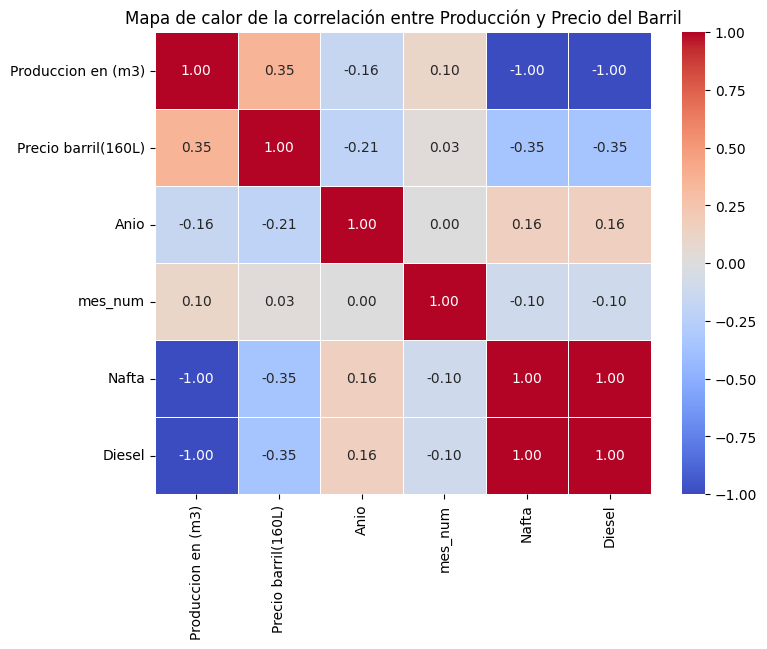

In [100]:
correlation_matrix = produccion[['Produccion en (m3)', 'Precio barril(160L)','Anio','mes_num','Nafta','Diesel']].corr()

# Crear el mapa de calor utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de calor de la correlación entre Producción y Precio del Barril')
plt.show()

Los datos estan pocos relacionados entre si no es que el aumento o disminusion de alguno afecta directamente a otros

Se puede decir tmb que el precio petroleo se ve afectado por factores externos como guerras y eso si puede influir en el precio mas directamente

In [102]:
produccion.to_csv('Producion petroleo limpio.csv',index=False)